In [7]:
import numpy as np
class VehicleClass():
    
    def __init__(self, horsepower):
        "This is the 'init' method"
        # this is a class attribute:
        self.horsepower = horsepower
        
    def horsepower_to_torque(self, rpm):
        "This is a regular method"
        numerator = self.horsepower * 33000
        denominator = 2* np.pi * 5000
        return numerator/denominator
    
    def tune_motor(self):
        self.horsepower *= 2
    
    def _private_method(self):
        print('this is private')
    
    def __very_private_method(self):
        print('this is very private')

In [8]:

# instantiate an object:
car1 = VehicleClass(horsepower=123)
print(car1.horsepower)

123


In [9]:
car1.horsepower_to_torque(rpm=5000)

129.20198280200063

In [10]:
car1._private_method()

this is private


In [11]:
class CarClass(VehicleClass):

    def __init__(self, horsepower):
        super(CarClass, self).__init__(horsepower)
        self.num_wheels = 4
    
new_car = CarClass(horsepower=123)
print('Number of wheels:', new_car.num_wheels)
print('Horsepower:', new_car.horsepower)
new_car.tune_motor()
print('Horsepower:', new_car.horsepower)

Number of wheels: 4
Horsepower: 123
Horsepower: 246


In [22]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Iris.csv')
df=pd.DataFrame(df)
d = {'Iris-setosa': 0,
     'Iris-versicolor': 1,
     'Iris-virginica': 2}
df['Species'] = df['Species'].map(d)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [3]:
import numpy as np
indices = np.arange(df.shape[0])
rng = np.random.RandomState(123)
permuted_indices = rng.permutation(indices)
permuted_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

In [18]:
train_size, valid_size = int(0.65*df.shape[0]), int(0.15*df.shape[0])
test_size = df.shape[0] - (train_size + valid_size)
print(train_size, valid_size, test_size)

97 22 31


In [19]:
train_ind = permuted_indices[:train_size]
valid_ind = permuted_indices[train_size:(train_size + valid_size)]
test_ind = permuted_indices[(train_size + valid_size):]

In [88]:
X_train,y_train = df.values[train_ind,1:5],df.values[train_ind,5]
X_valid, y_valid = df.values[valid_ind,1:5], df.values[valid_ind,5]
X_test, y_test = df.values[test_ind,1:5], df.values[test_ind,5]

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


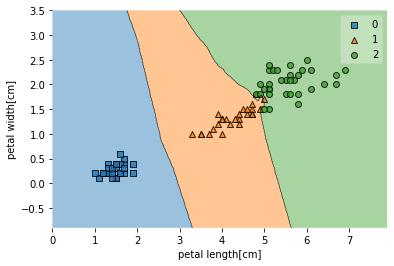

In [103]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train[:, 2:], y_train)
y=y_train.astype(int)
plot_decision_regions(X_train[:, 2:], y, knn_model)
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.show()

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
X=df.values[1:150,1:5]
print(X)
y=df.values[1:150,5]
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                         shuffle=True, random_state=123, stratify=y)
np.bincount(y_train.astype(int))

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.

array([39, 40, 40])

In [20]:
X_train, X_valid, y_train, y_valid = \
        train_test_split(X_temp, y_temp, test_size=0.2,
                         shuffle=True, random_state=123, stratify=y_temp)
print('Train size', X_train.shape, 'class proportions', np.bincount(y_train.astype(int)))
print('Valid size', X_valid.shape, 'class proportions', np.bincount(y_valid.astype(int)))
print('Test size', X_test.shape, 'class proportions', np.bincount(y_test.astype(int)))

Train size (95, 4) class proportions [31 32 32]
Valid size (24, 4) class proportions [8 8 8]
Test size (30, 4) class proportions [10 10 10]


Veri Normalizasyonu

In [13]:
x = np.arange(6).astype(float)
print(x)
x_norm = (x - x.min()) / (x.max() - x.min())
print(x_norm)

[0. 1. 2. 3. 4. 5.]
[0.  0.2 0.4 0.6 0.8 1. ]


In [14]:
df = pd.DataFrame([1, 2, 1, 2, 3, 4])
df[0].std()

1.1690451944500122

In [16]:
df = pd.DataFrame([1, 2, 1, 2, 3, 4])
print(df[0].std())
print(df[0].values.std())

1.1690451944500122
1.0671873729054748


In [24]:
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)

X_train_std = (X_train - mu) / sigma
X_valid_std = (X_valid - mu) / sigma
X_test_std = (X_test - mu) / sigma
print(X_train_std)

[[ 2.36808434e-01  8.37350582e-01  4.26341374e-01  5.28000106e-01]
 [-3.78479855e-01  1.07125837e+00 -1.40193335e+00 -1.32389079e+00]
 [ 3.59866091e-01 -5.66096168e-01  5.40608543e-01 -1.11157917e-03]
 [-1.48599877e+00  8.37350582e-01 -1.34479976e+00 -1.19161287e+00]
 [-1.23988346e+00  8.37350582e-01 -1.23053259e+00 -1.32389079e+00]
 [ 1.13750776e-01 -9.82805848e-02  7.69142883e-01  7.92555949e-01]
 [-7.47652828e-01  2.47470513e+00 -1.28766618e+00 -1.45616871e+00]
 [-5.01537512e-01  2.00688954e+00 -1.17339901e+00 -1.05933495e+00]
 [ 2.32878861e+00 -1.03391175e+00  1.79754741e+00  1.45394556e+00]
 [ 6.05981407e-01 -1.73563513e+00  3.69207789e-01  1.31166342e-01]
 [-9.93768143e-01  8.37350582e-01 -1.28766618e+00 -1.32389079e+00]
 [-8.70710486e-01  1.77298175e+00 -1.05913184e+00 -1.05933495e+00]
 [-1.73211409e+00 -3.32188377e-01 -1.34479976e+00 -1.32389079e+00]
 [ 6.05981407e-01  6.03442791e-01  1.28334515e+00  1.71850140e+00]
 [-9.93768143e-01 -9.82805848e-02 -1.23053259e+00 -1.32389079e

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)

In [27]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/categoricaldata.csv")
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XXL,15.3,class1


In [28]:
mapping_dict = {'M': 2,
                'L': 3,
                'XXL': 5}

df['size'] = df['size'].map(mapping_dict)
df

,color,size,price,classlabel
0,green,2,10.1,class1
1,red,3,13.5,class2
2,blue,5,15.3,class1


In [29]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['classlabel'] = le.fit_transform(df['classlabel'])
df

,color,size,price,classlabel
0,green,2,10.1,0
1,red,3,13.5,1
2,blue,5,15.3,0


In [81]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris=datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [82]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.data